In [51]:
import json
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from distutils.dir_util import copy_tree
import os

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [52]:
class RunResult:
    def __init__(self, errors, evs, params, hessian):
        self.errors = errors
        self.evs = evs
        self.params = params
        self.hessian = hessian

In [146]:
def sync():
    copy_tree("./", "D:\MyDrive\ST Yau Photos")


sync()

In [55]:
def get_run_result(summ_dir):
    summ_fns = os.listdir(summ_dir)

    jsons = []
    errors = []
    evs = []
    params = []
    hessian = []
    for fn in summ_fns:
        with open(summ_dir + fn) as file:
            data = json.load(file)
            jsons.append(data)
            evs.append(data['evs'])
            errors.append(data['error'])
            params.append(data['params'])
            hessian.append(data['hessian'])

    errors = pd.Series(errors, name='error')
    evs = pd.DataFrame(evs)

    return RunResult(errors, evs, np.array(params), np.array(hessian))


,abhlla,heslla,abhstlla,gra
0,893386.959681,893386.942815,893386.959681,891813.032869
1,822654.410559,849126.235302,845176.389866,847243.725331
2,768726.165704,813458.061077,806319.034837,837684.799883
3,734594.945389,783599.118957,783368.130167,834642.603031
4,713420.597150,759515.792835,767317.801116,832570.037354
5,700049.815063,743690.007155,754836.901286,831183.503872
6,645828.956085,735427.213698,744457.735779,829578.928216
7,639784.263522,731935.846133,735395.243353,828625.263398
8,597366.376793,731662.667591,727132.163707,827218.356095
9,541565.900561,731368.418688,719417.065782,826468.495135


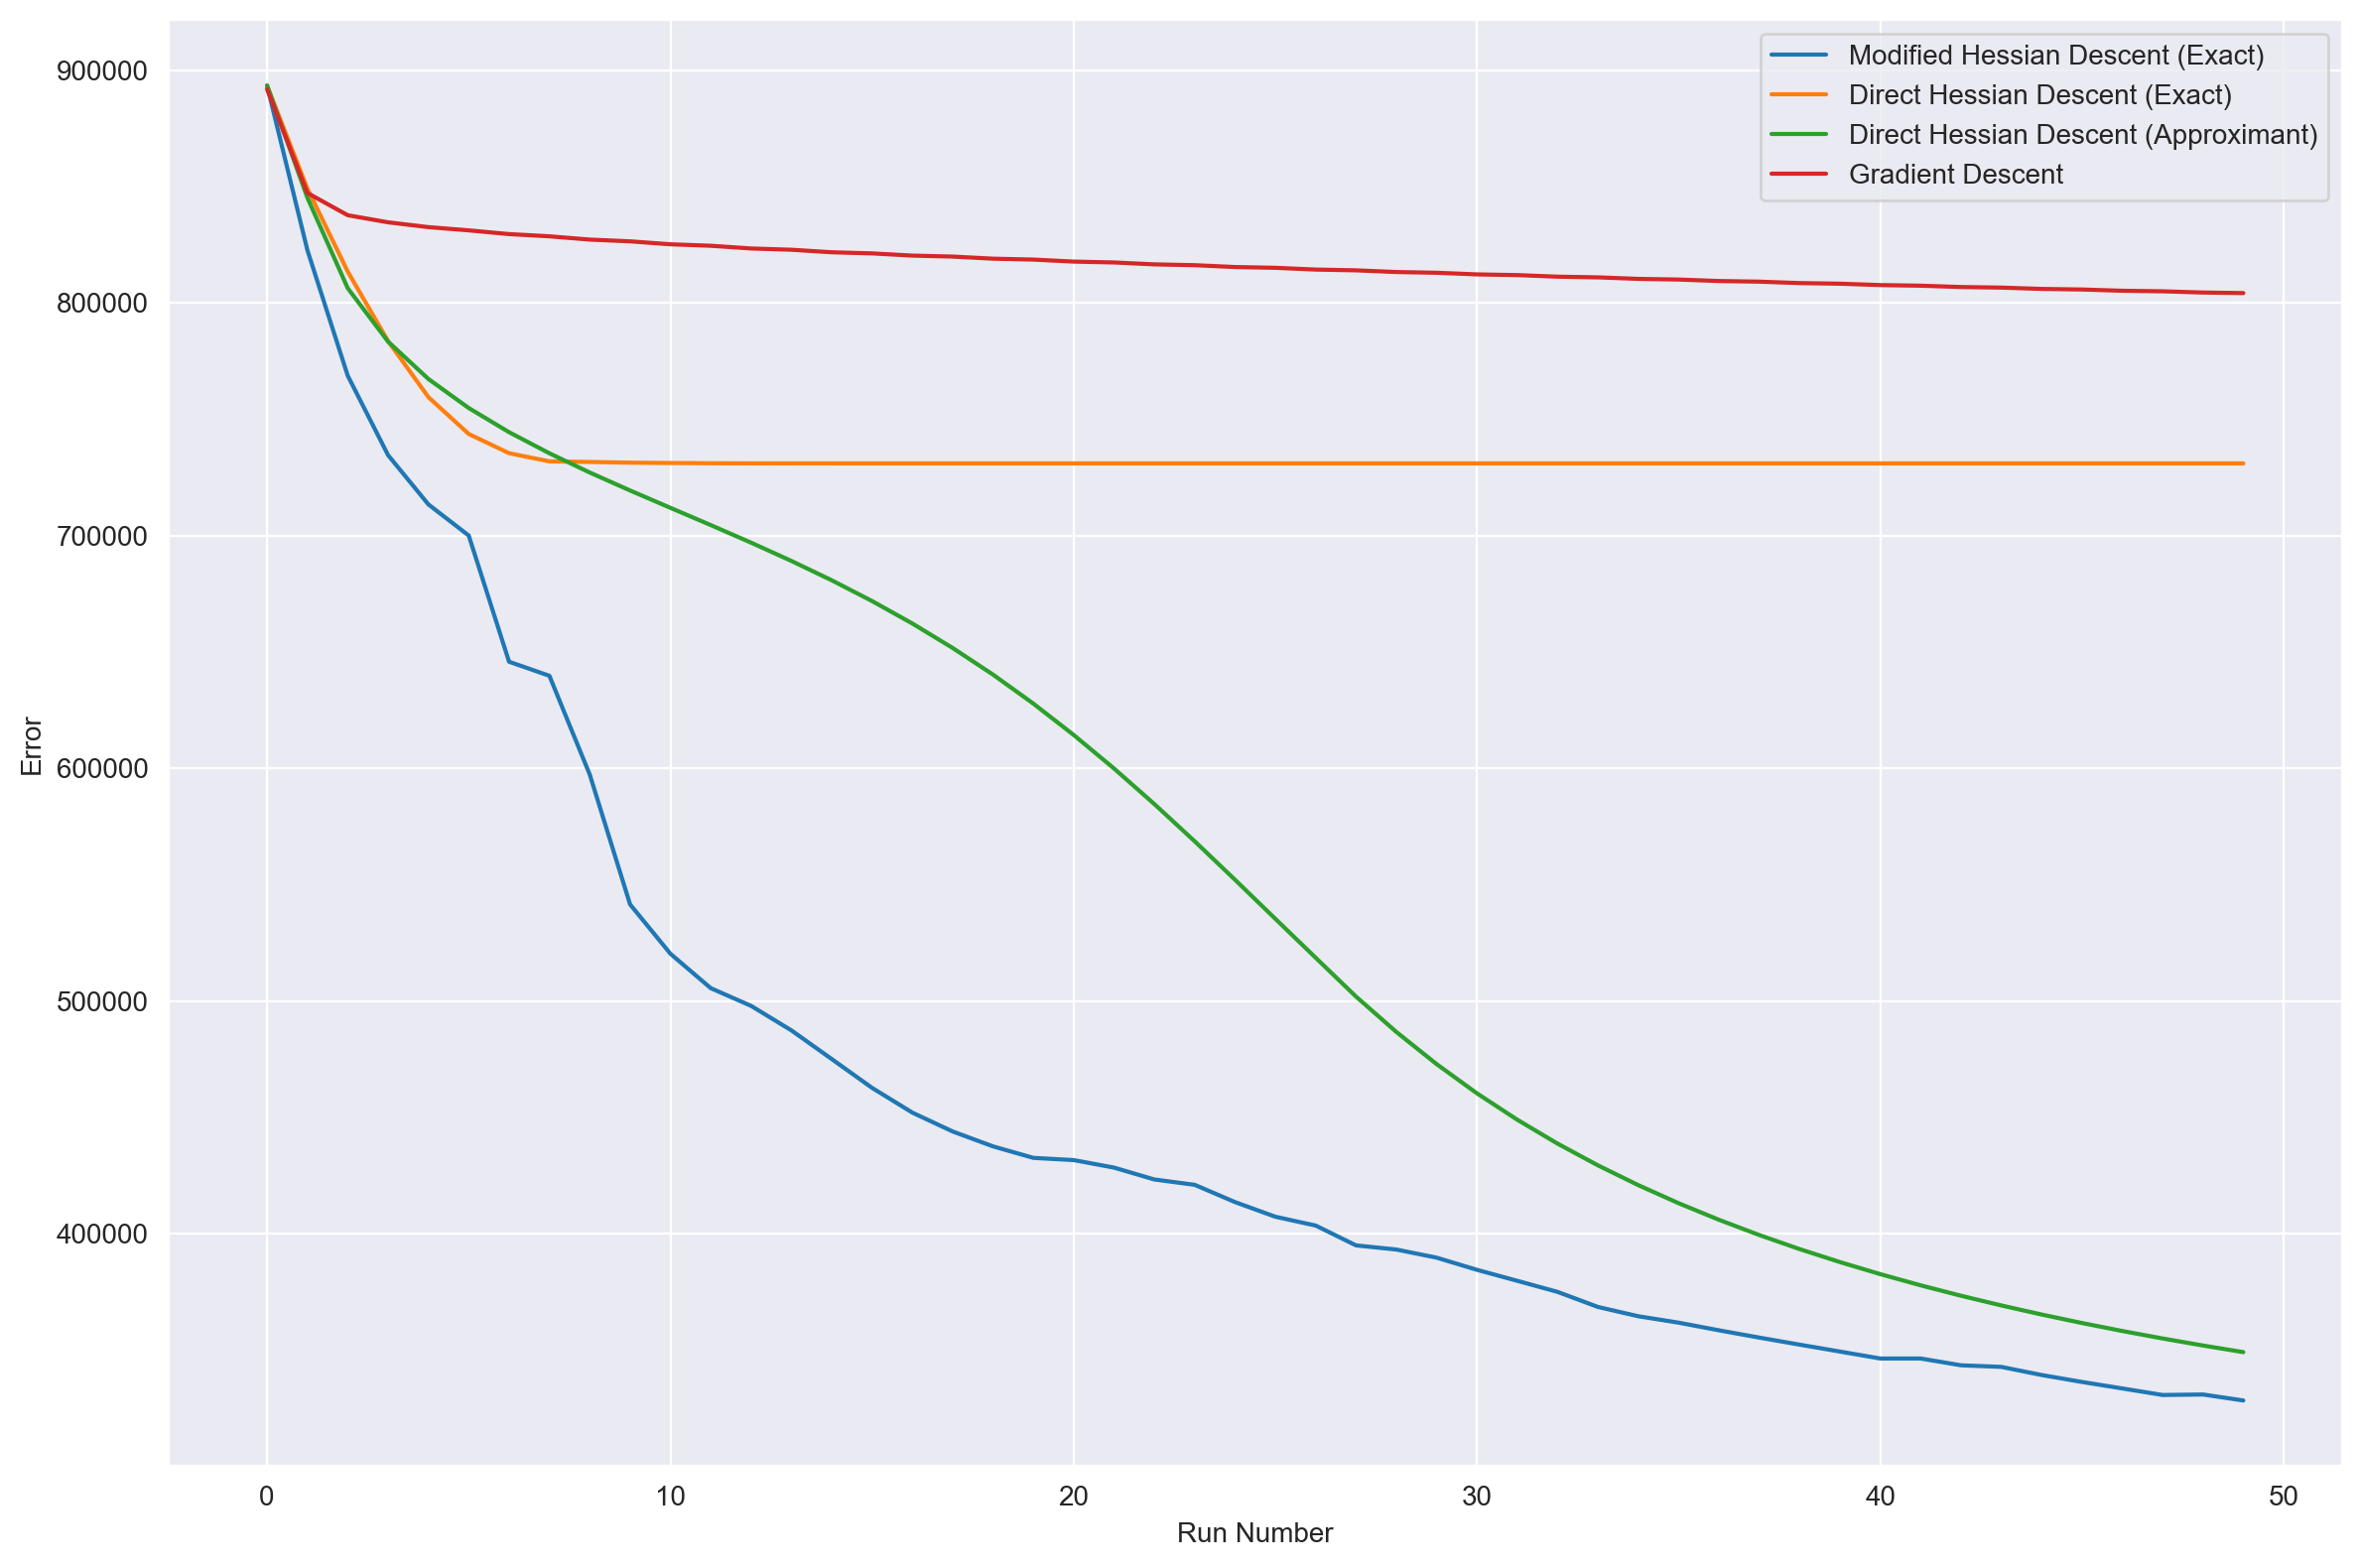

In [89]:
short = ['abhlla', 'heslla', 'abhstlla']
long = ['Modified Hessian Descent (Exact)',
        'Direct Hessian Descent (Exact)',
        'Direct Hessian Descent (Approximant)']

rrs = [get_run_result('../../archivesfixed/' + x + '/summaries/') for x in short]


def gr(string):
    return rrs[short.index(string)]


# rrs.append(get_run_result('../../summaries/'))
# long.append('Current')

gradient_errors = pd.read_csv('../ssef/gradienterrors.csv', header=None).iloc[:50]
short.append('gra')
long.append('Gradient Descent')

errorss = [x.errors for x in rrs]
errorss.append(gradient_errors)
errors_df = pd.concat(errorss, axis=1)
errors_df.columns = short
display(errors_df)

plt.figure(figsize=(12, 8), dpi=200, tight_layout=True)
ax = None
for rr in rrs:
    ax = sns.lineplot(x=rr.errors.index, y=rr.errors)

sns.lineplot(x=[i for i in range(len(gradient_errors))], y=gradient_errors[0])

ax.legend(long)
ax.set(xlabel='Run Number', ylabel='Error')

plt.savefig('rvs-abhlla.png')

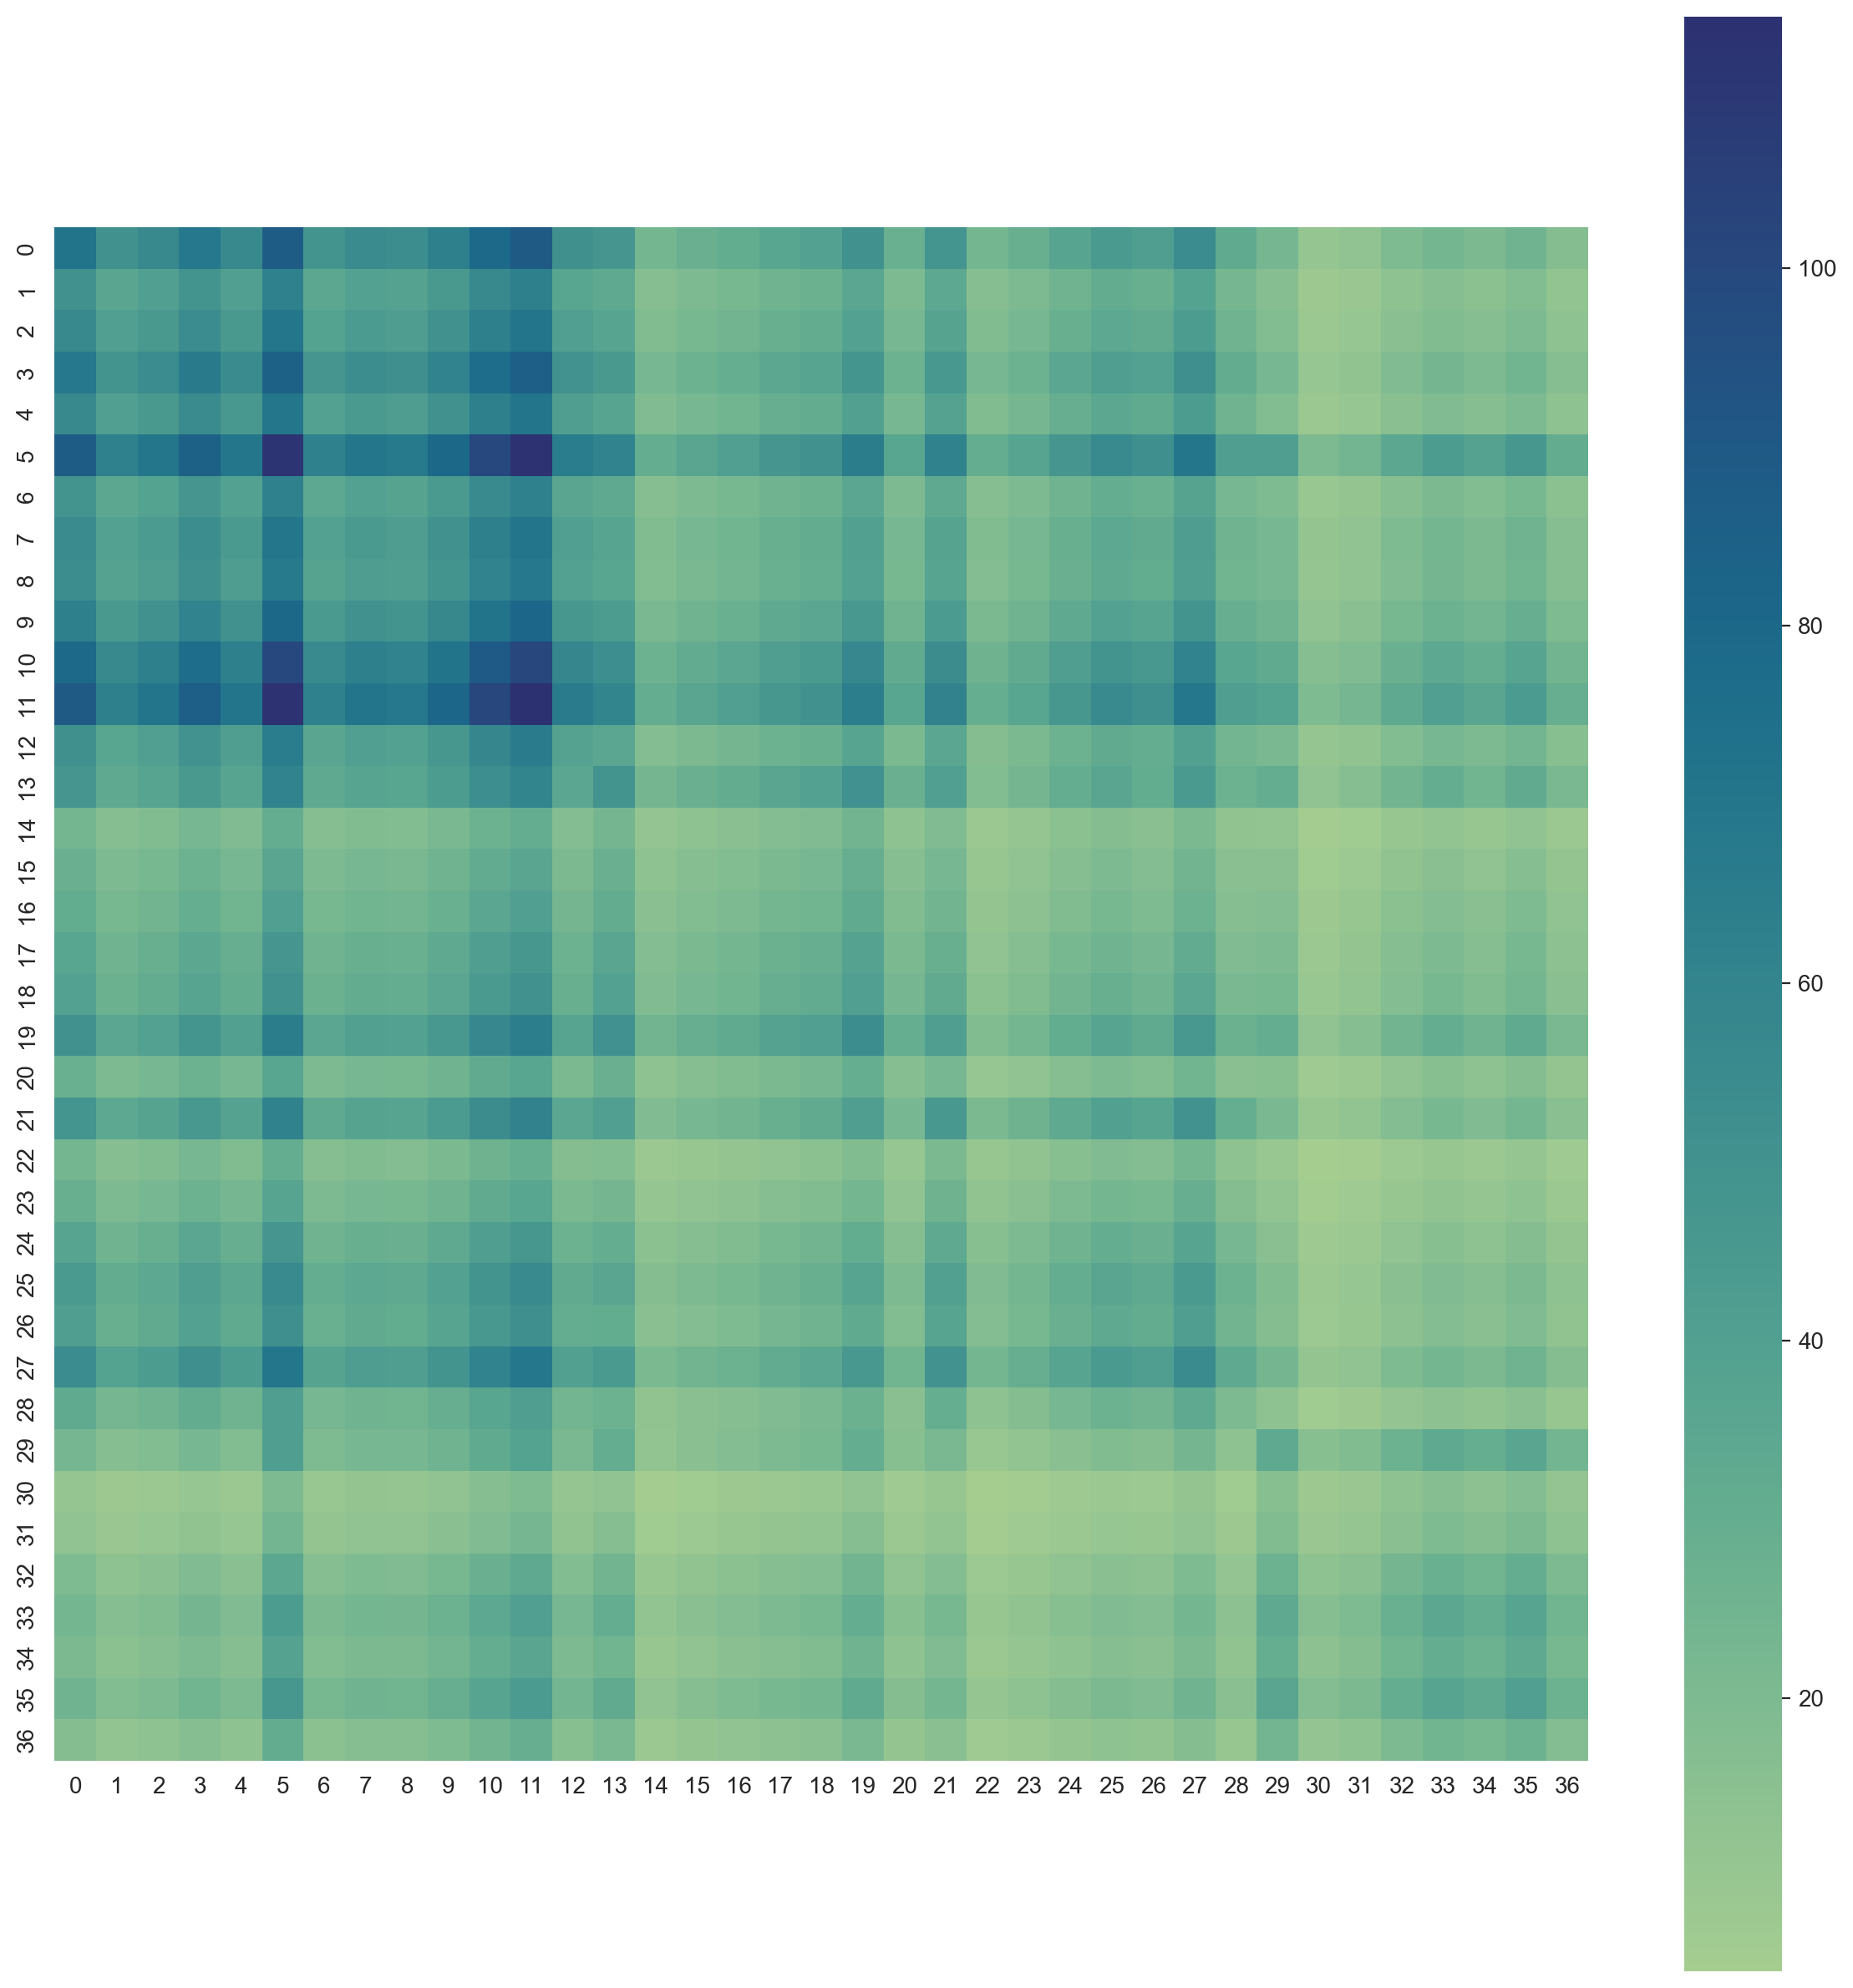

In [90]:
def plot_hessian(hes, cmap='crest'):
    plt.figure(figsize=(12, 12), dpi=200, tight_layout=True)

    sns.heatmap(hes, cmap=cmap, square=True)


abhlla = gr('abhlla')
abhstlla = gr('abhstlla')

plot_hessian(np.power(np.abs(abhlla.hessian[0]), 1 / 5))
plt.savefig('regular-hessian.png')

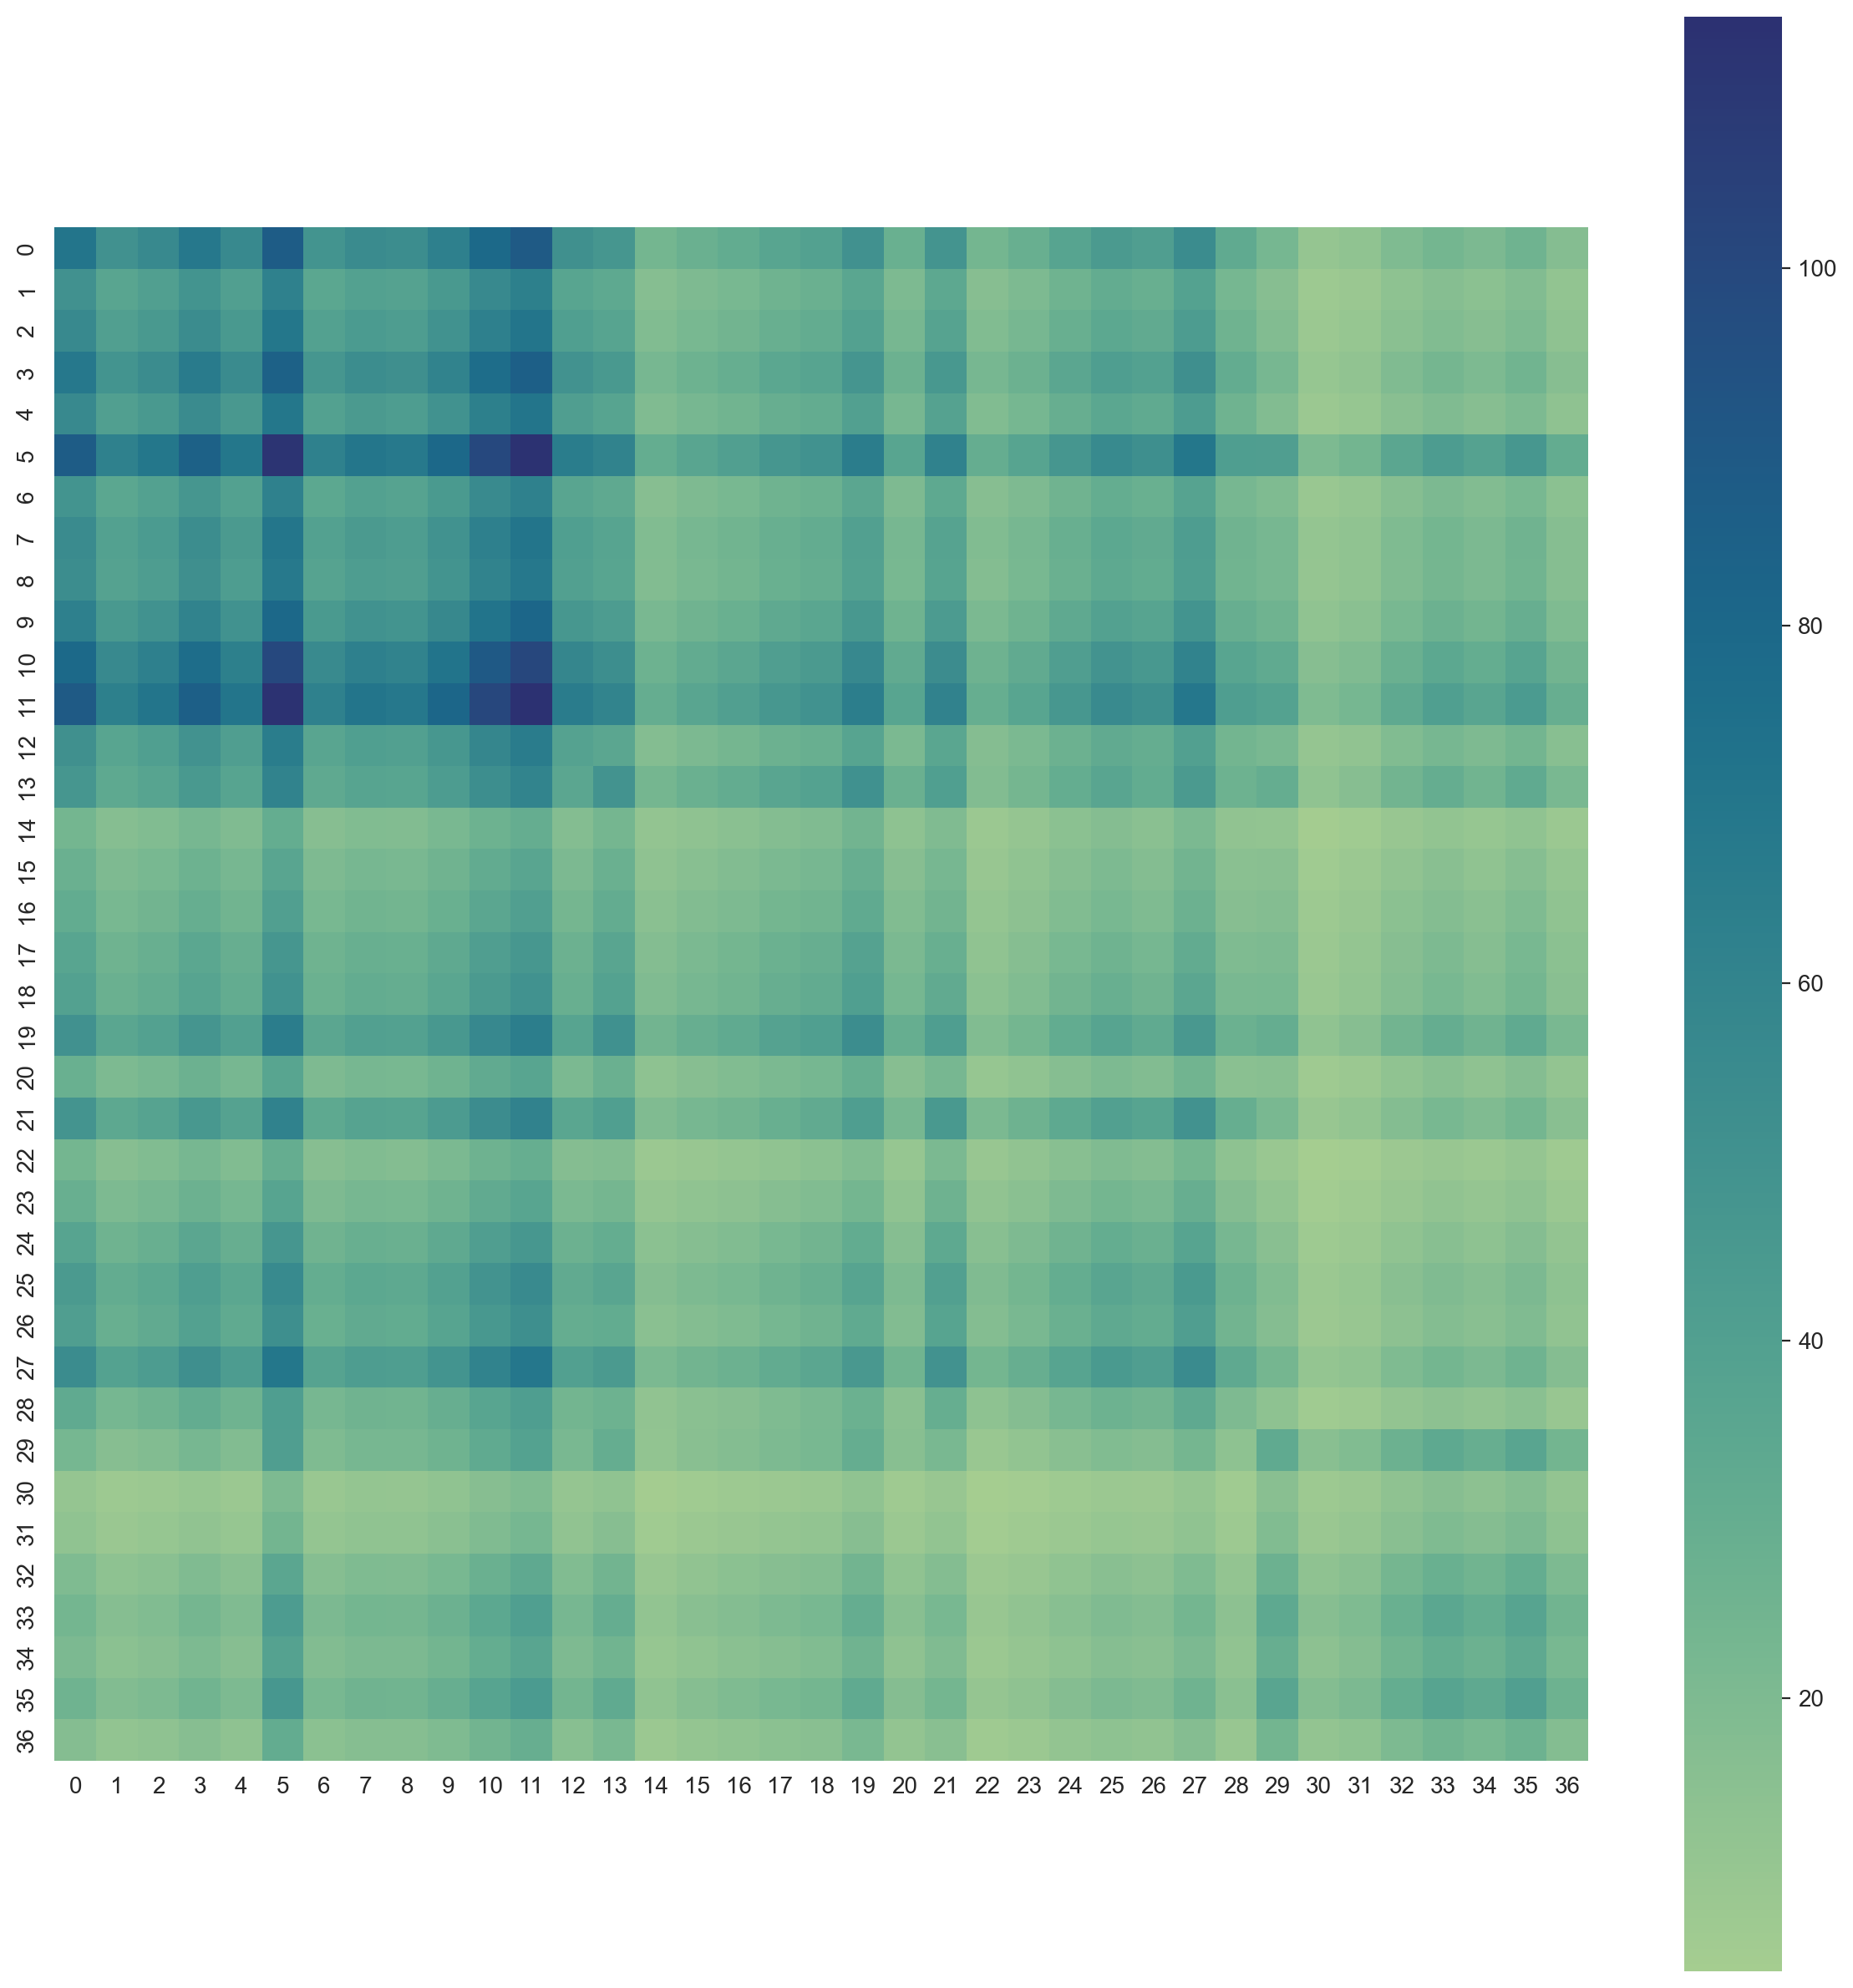

In [91]:
plot_hessian(np.power(np.abs(abhstlla.hessian[0]), 1 / 5))
plt.savefig('stewart-hessian.png')


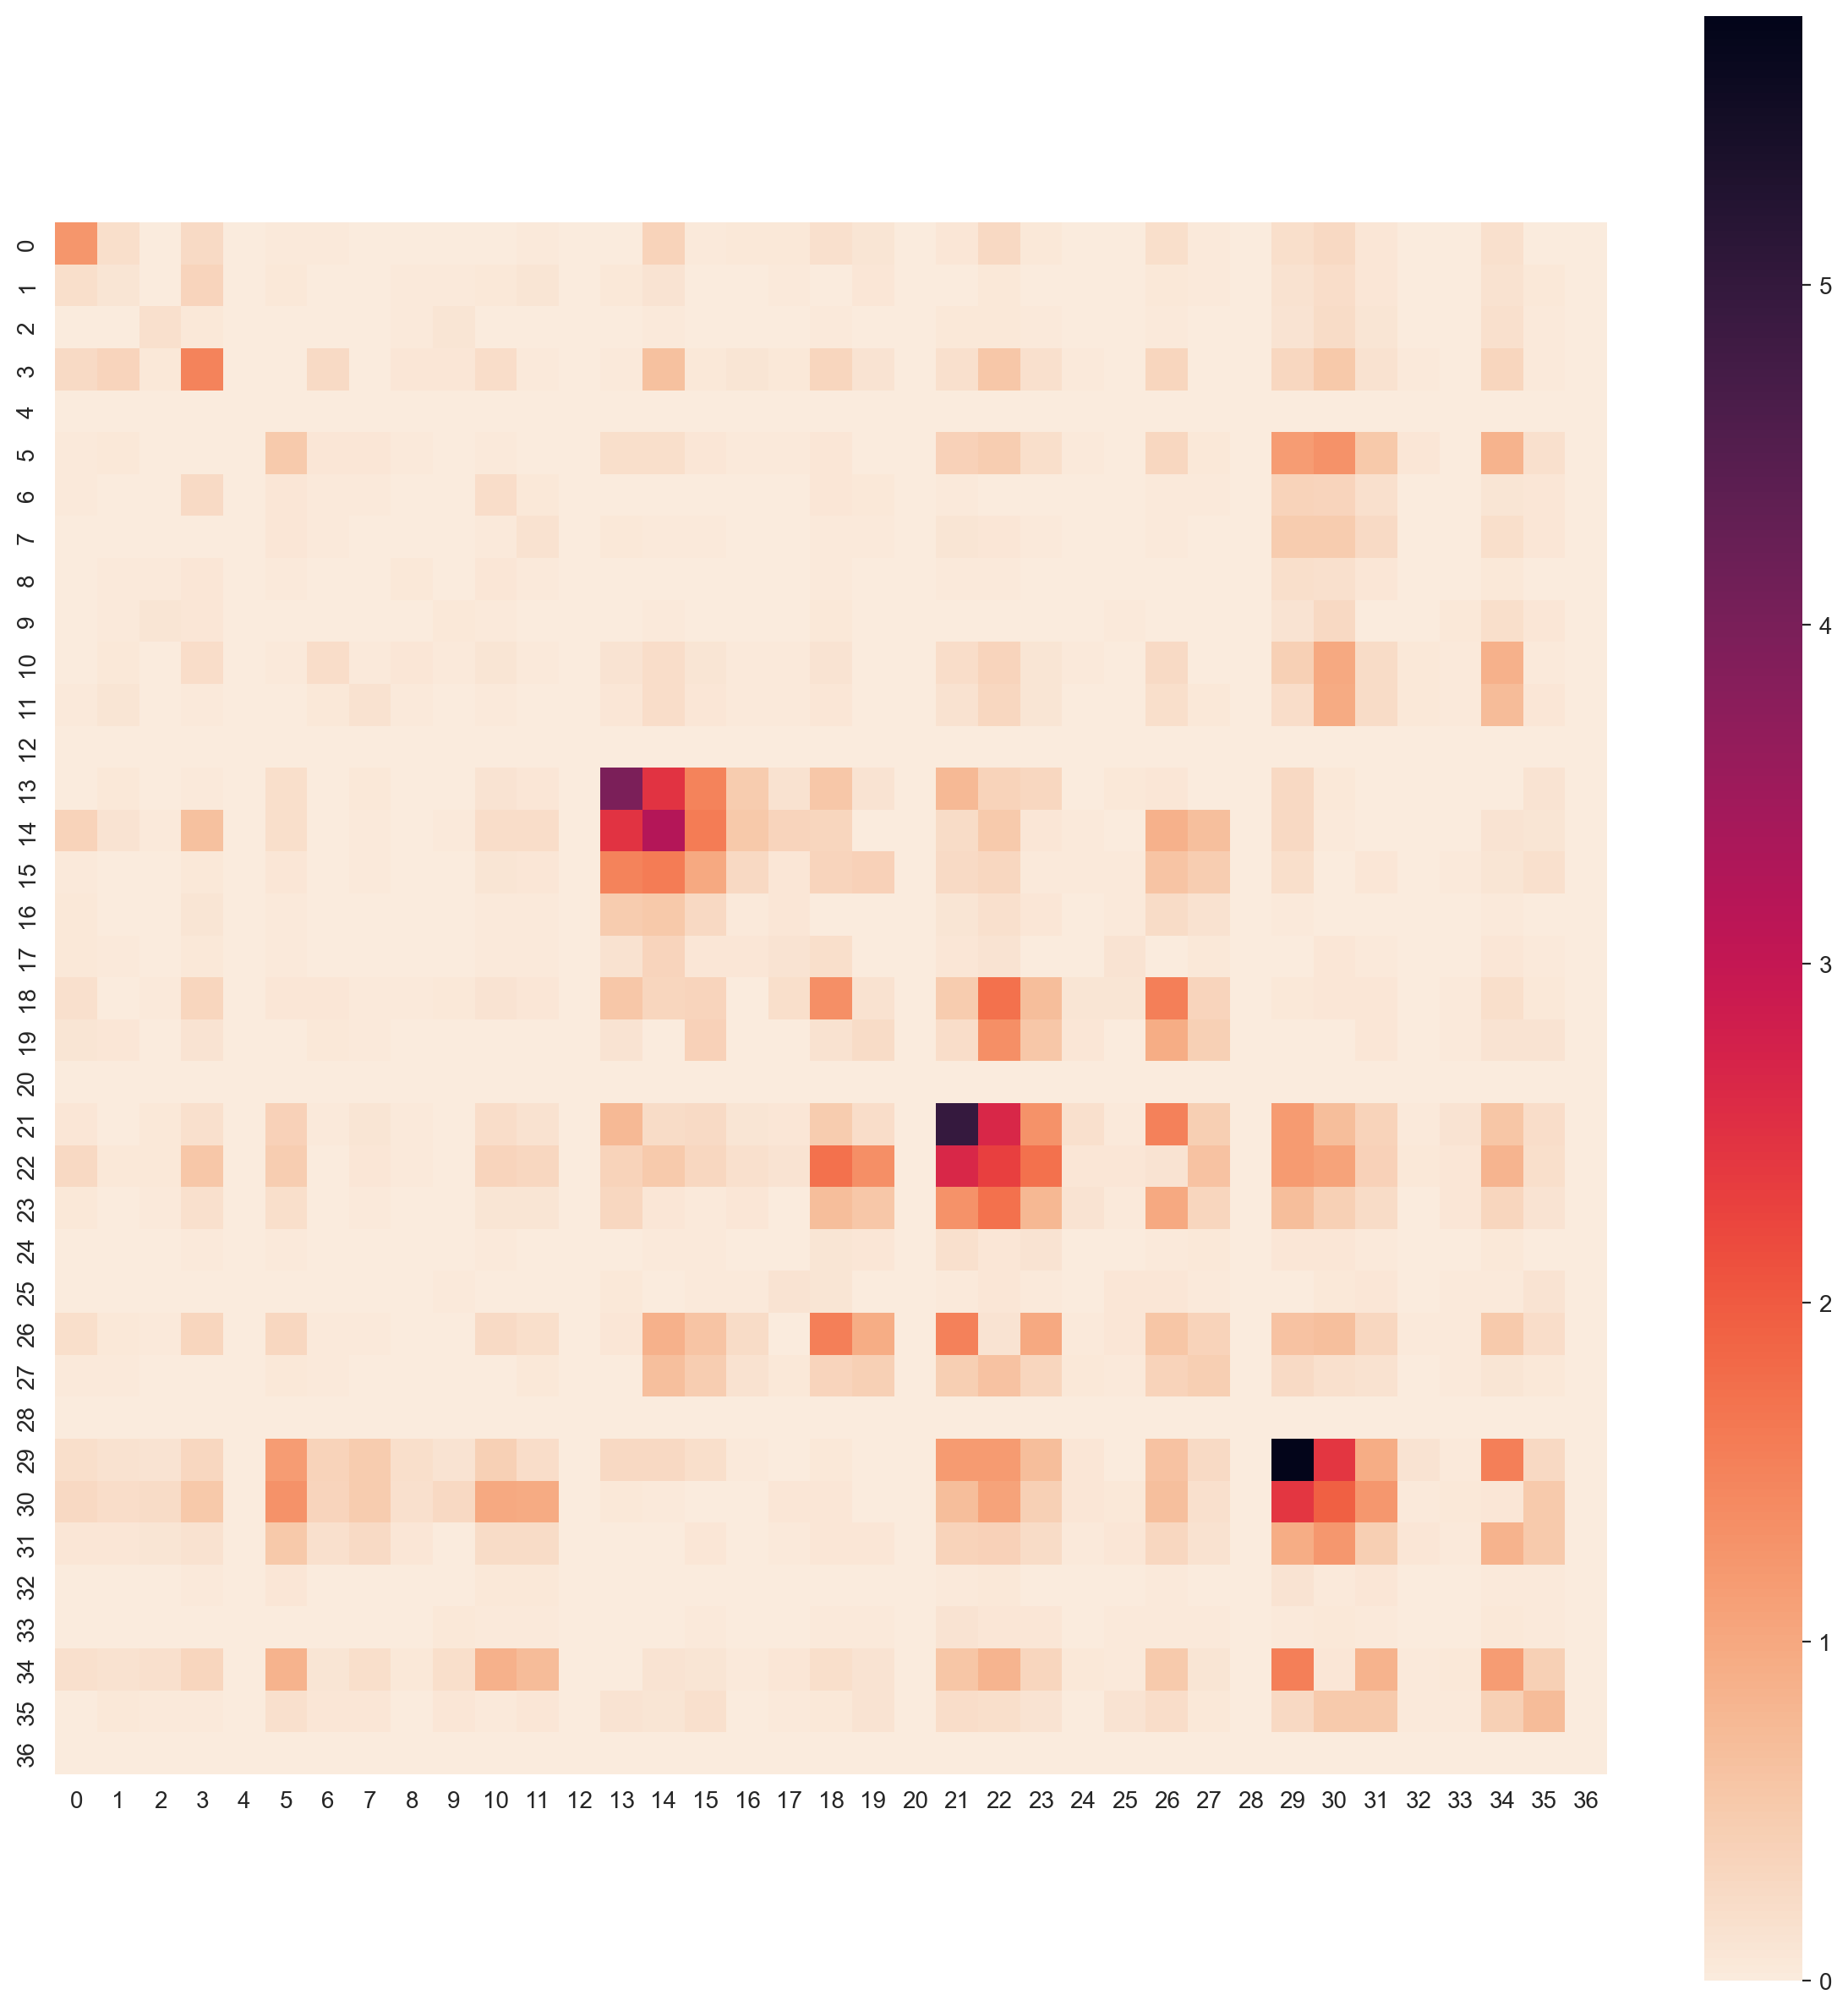

In [92]:
plot_hessian(np.abs((abhstlla.hessian[0] - abhlla.hessian[0]) / abhlla.hessian[0]) * 100, 'rocket_r')
plt.savefig('hessian-diff.png')


In [108]:
final_params = abhlla.params[48].T
np.savetxt('final-params.csv', final_params, delimiter=',', fmt='%f')
final_params

array([[   2.71272258,    2.62500027,    2.88258416,    3.22631792,
           3.4807285 ],
       [  -6.38799195,  -16.88347703,  -17.78474521,  -65.17616202,
         -95.88229185],
       [   0.        ,   -7.2807295 ,  -18.55188476,  -26.16413745,
         -34.17888683],
       [ -11.88939921,  -50.55613462,  -64.39536759,  -98.119788  ,
        -125.19823677],
       [   0.        ,  -39.08111249,  -56.89664703,  -78.393315  ,
        -105.99245731],
       [   1.32060295,    1.8592967 ,    2.79328327,    4.81803187,
           5.63358864],
       [   0.        ,    1.81894892,    2.15433896,    2.47260986,
           2.95898511],
       [ -11.76785165, -115.8325688 , -186.85800214, -316.85936985,
        -464.02305964],
       [  12.848     ,   12.23      ,   13.59      ,   15.42      ,
          16.92      ],
       [   0.        ,   11.47      ,   12.66      ,   14.48      ,
          17.25      ],
       [   0.        ,    2.43      ,    3.14      ,    3.94      ,
           4

In [132]:
np.savetxt('initial-eigen.csv', abhlla.evs.iloc[0])


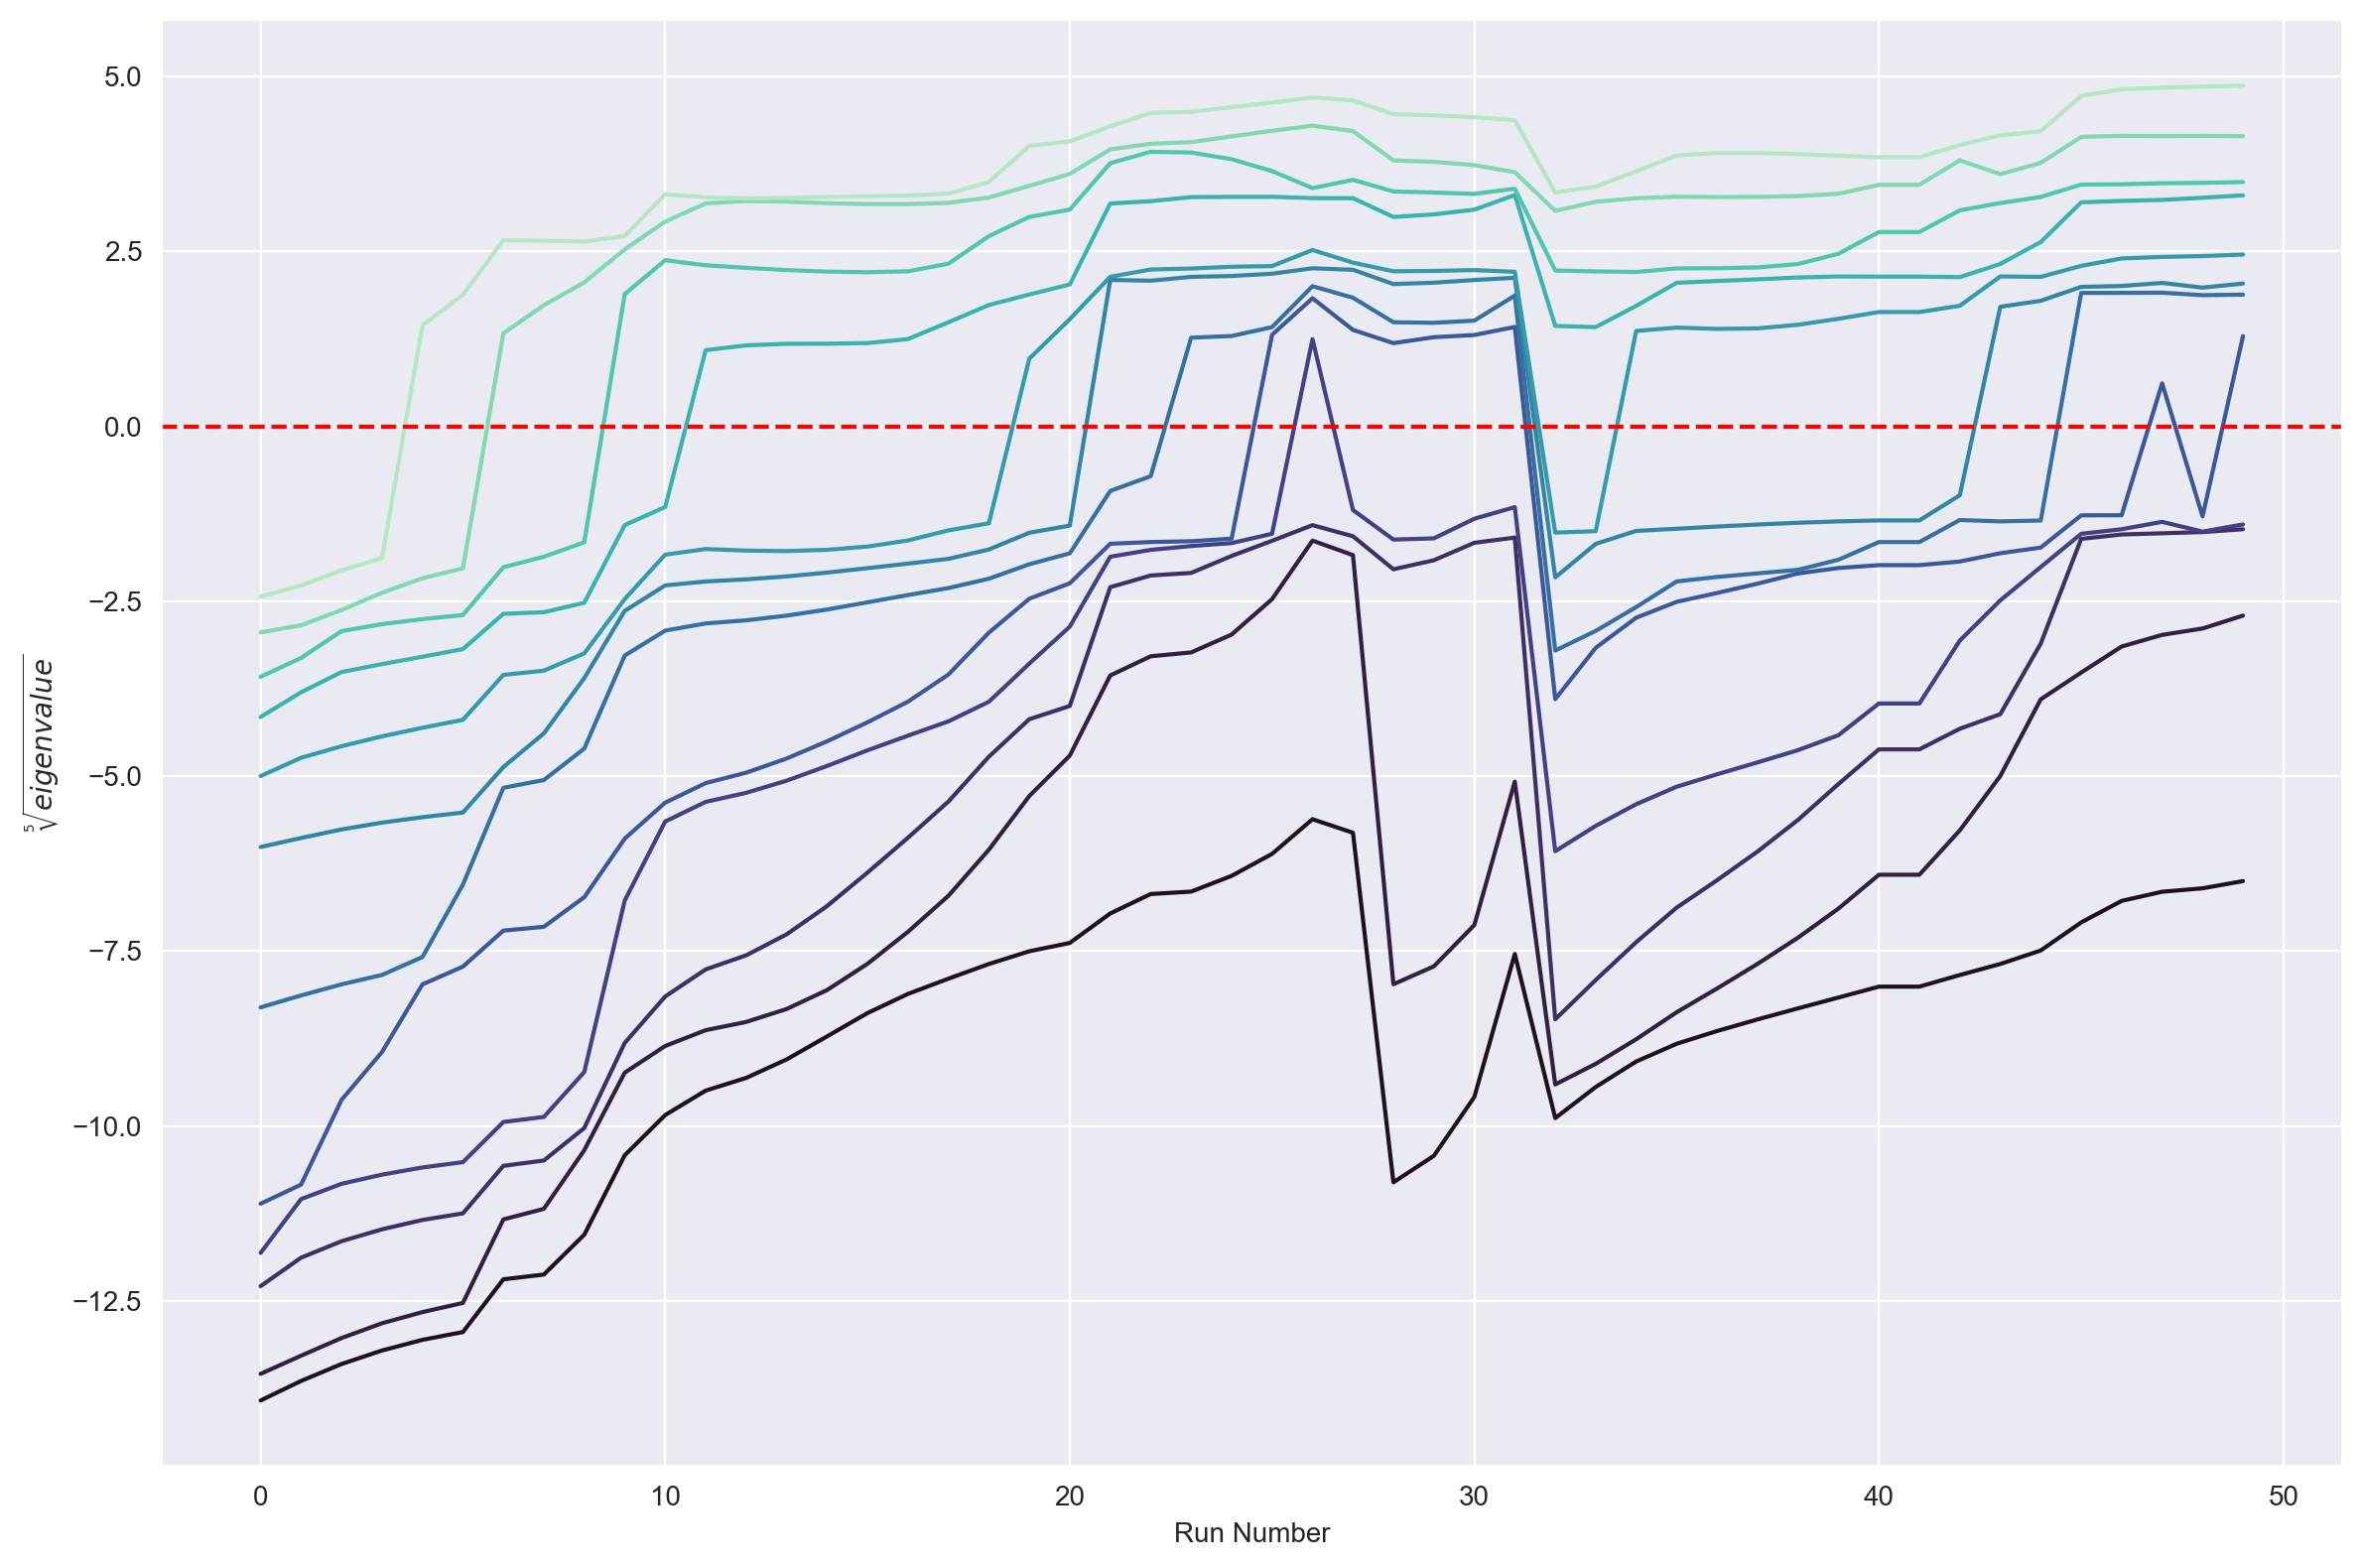

In [164]:
n = 12
evs = abhlla.evs.iloc[:, :n]
logevs = np.sign(evs) * evs.abs() ** (1 / 5)

plt.figure(figsize=(12, 8), dpi=200, tight_layout=True)
pal = sns.color_palette('mako', n)

ax = None
for i in range(len(logevs.columns)):
    ax = sns.lineplot(x=logevs.index, y=logevs[i], color=pal[i])

ax.set(xlabel='Run Number', ylabel=r'$\sqrt[5]{eigenvalue}$')

plt.axhline(y=0, color='r', linestyle='--')

plt.savefig('neg_evs.png')
sync()

<AxesSubplot:>

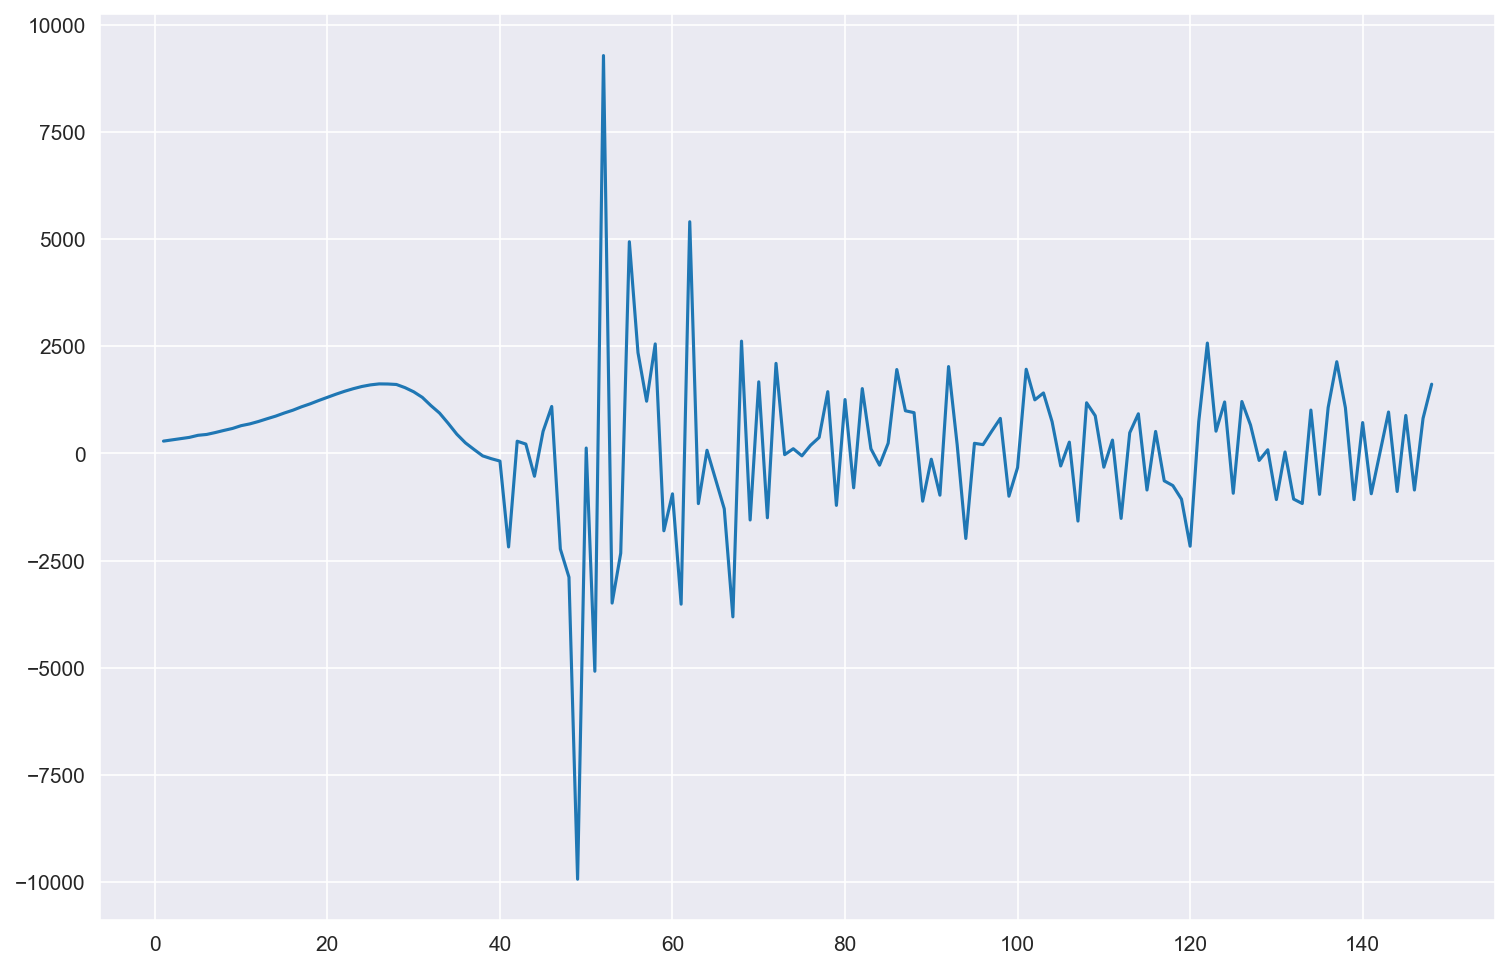

In [50]:
endn = len(abhst.errors) - 1
ggs = []

for i in range(1, endn):
    g = abh.errors[i] - abh.errors[i - 1]
    stg = abhst.errors[i] - abhst.errors[i - 1]
    ggs.append(g - stg)

plt.figure(figsize=(12, 8), dpi=150)
sns.lineplot(x=[x for x in range(1, endn)], y=ggs)

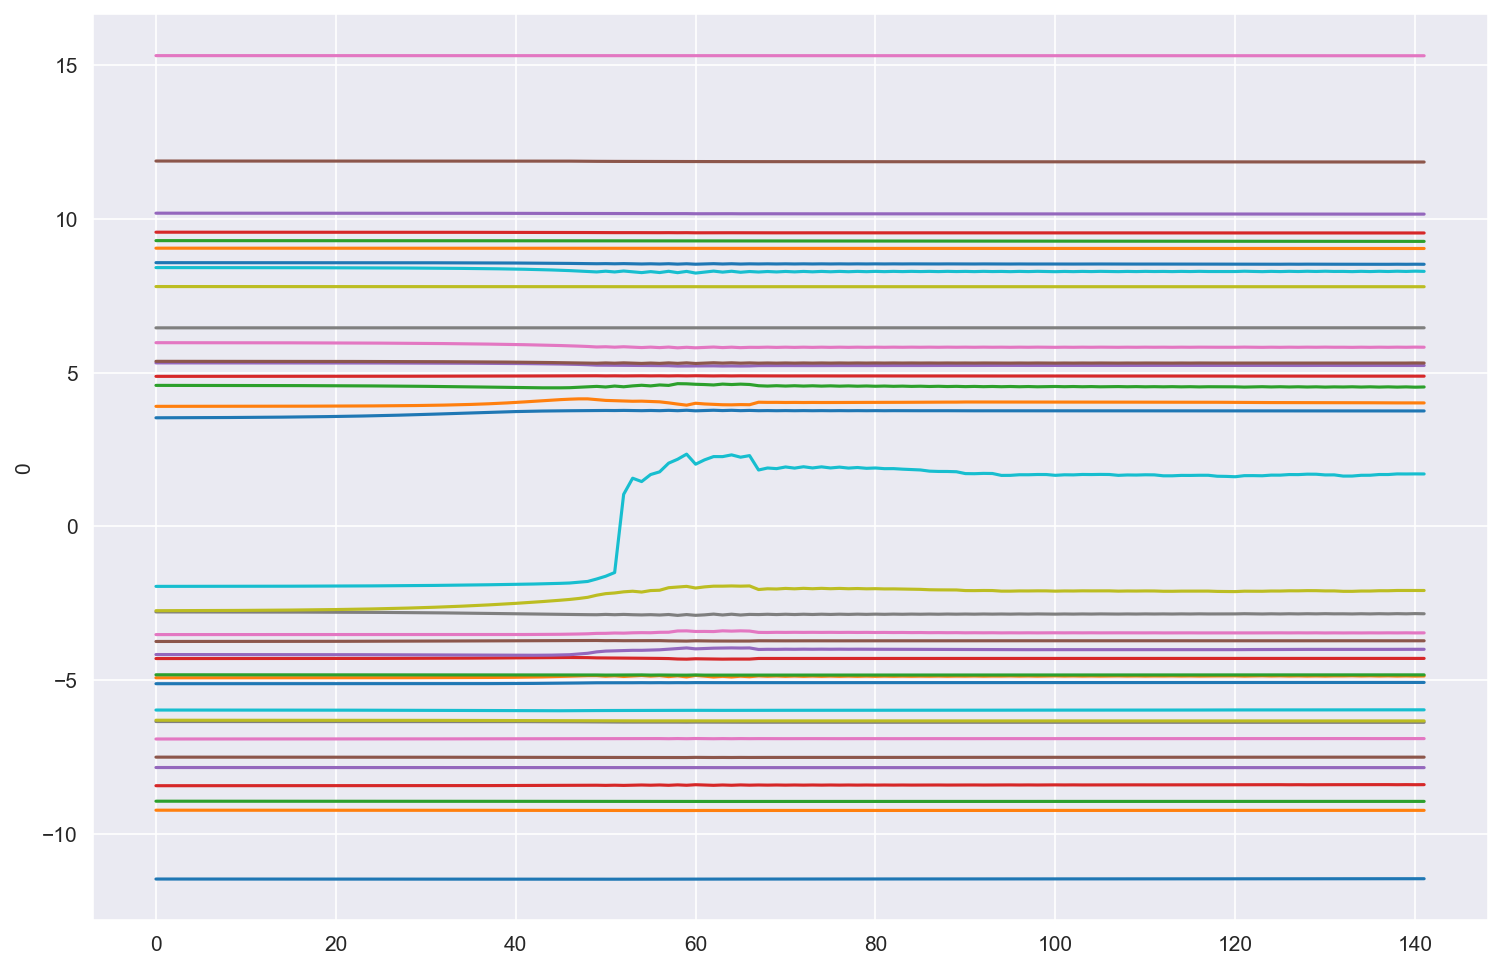

In [196]:
logevs = np.sign(evs) * evs.abs() ** (1 / 9)
# logevs = np.sign(evs) * np.log10(evs.abs())

plt.figure(figsize=(12, 8), dpi=150)
for i in range(len(logevs.columns)):
    sns.lineplot(x=logevs.index, y=logevs[i])

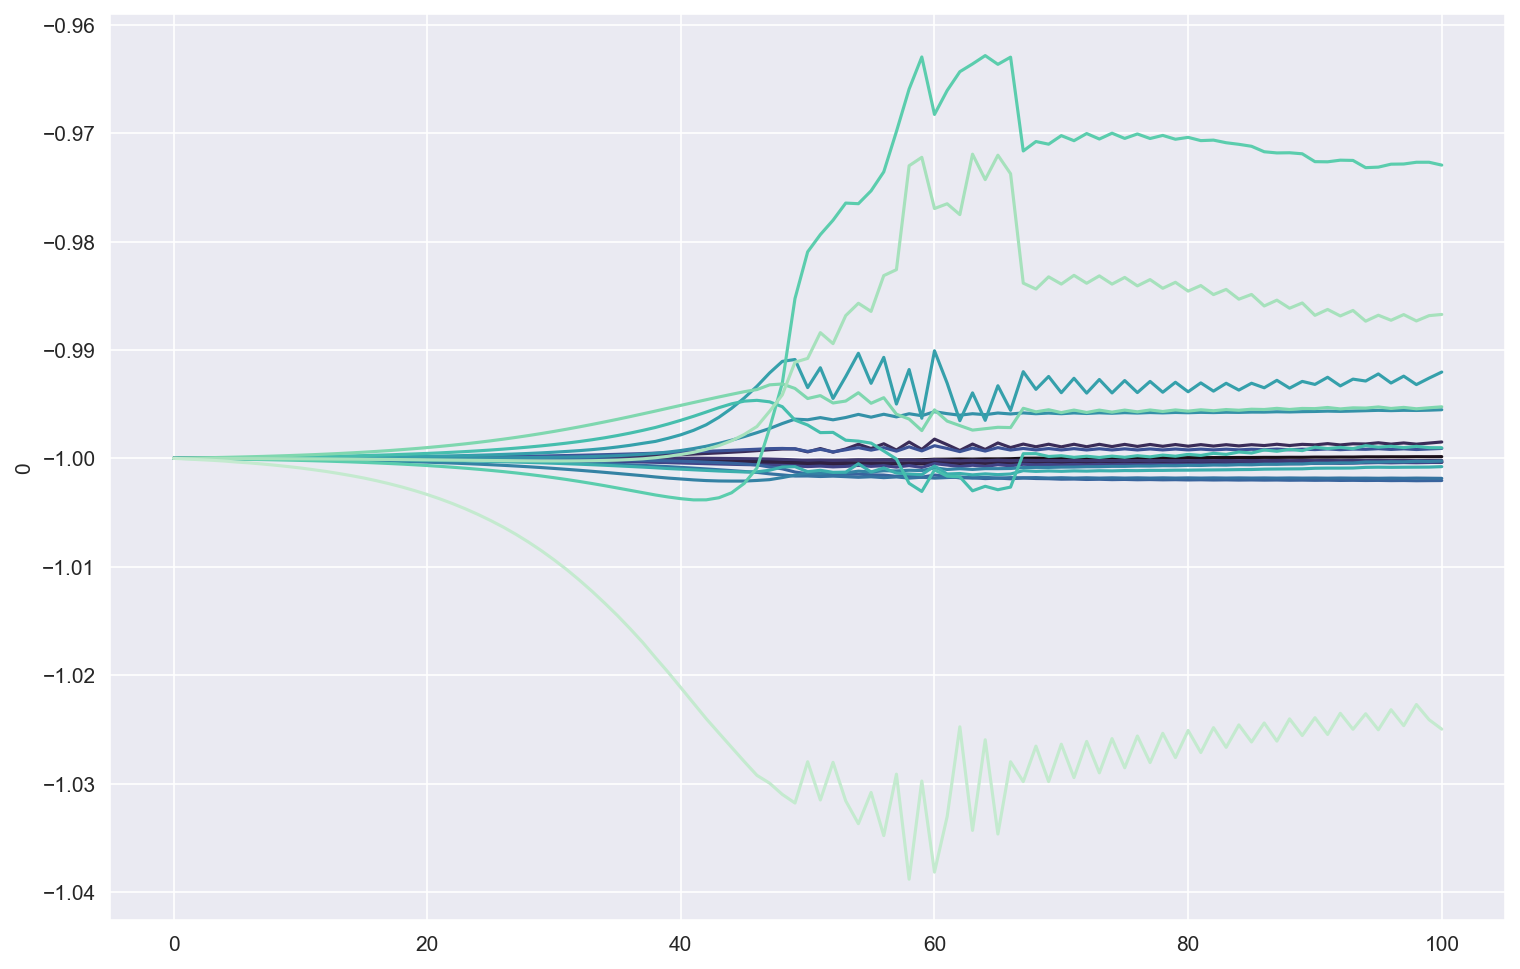

In [181]:
plt.figure(figsize=(12, 8), dpi=150)

n = len(logevs.columns)
n = 18
pal = sns.color_palette('mako', n)
for i in range(n):
    sns.lineplot(x=logevs.index, y=logevs[i] / abs(logevs.iloc[0, i]), color=pal[i])
